## 1. Importing Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 2. Data Preprocessing

In [5]:
df.rename(columns={'FAVC':'Frequent_high_caloric_food','FCVC':'Vegetables_in_meal','NCP':'No._of_main_meals_daily','CAEC':'Any_food_between_meals','CH2O':'Daily_drinking_Water','SCC':'Calories_monitoring_daily','FAF':'Physical_activity','TUE':'Time_spent_in_technological_devices','CALC':'Alcohol','MTRANS':'MeansOfTransport'},inplace=True)
df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent_high_caloric_food,Vegetables_in_meal,No._of_main_meals_daily,Any_food_between_meals,SMOKE,Daily_drinking_Water,Calories_monitoring_daily,Physical_activity,Time_spent_in_technological_devices,Alcohol,MeansOfTransport,NObeyesdad
1911,Female,18.314593,1.745602,133.554686,yes,yes,3.000000,3.000000,Sometimes,no,2.923792,no,1.536555,0.625350,Sometimes,Public_Transportation,Obesity_Type_III
463,Male,17.000000,1.800000,68.000000,yes,no,2.000000,3.000000,Sometimes,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1734,Male,30.717727,1.767140,120.344402,yes,yes,2.117121,3.000000,Sometimes,no,2.193008,no,0.992829,1.556052,Sometimes,Automobile,Obesity_Type_II
1429,Male,36.673882,1.792100,101.285765,yes,yes,2.222282,1.578751,Sometimes,no,2.791604,no,2.352091,0.317846,Sometimes,Automobile,Obesity_Type_I
2076,Female,19.528936,1.817917,142.559161,yes,yes,3.000000,3.000000,Sometimes,no,2.562002,no,1.976427,0.740331,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df.shape

(2111, 17)

In [7]:
df.describe()

,Age,Height,Weight,Vegetables_in_meal,No._of_main_meals_daily,Daily_drinking_Water,Physical_activity,Time_spent_in_technological_devices
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
# Handling missing values
df.isnull().sum()

Gender                                 0
Age                                    0
Height                                 0
Weight                                 0
family_history_with_overweight         0
Frequent_high_caloric_food             0
Vegetables_in_meal                     0
No._of_main_meals_daily                0
Any_food_between_meals                 0
SMOKE                                  0
Daily_drinking_Water                   0
Calories_monitoring_daily              0
Physical_activity                      0
Time_spent_in_technological_devices    0
Alcohol                                0
MeansOfTransport                       0
NObeyesdad                             0
dtype: int64

In [9]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
df['Frequent_high_caloric_food'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
df['Any_food_between_meals'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [13]:
df['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
df['Calories_monitoring_daily'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df['Alcohol'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [16]:
df['MeansOfTransport'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [17]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [18]:
# check for duplicate values
df.duplicated().sum()

24

In [19]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [20]:
df.shape

(2087, 17)

In [21]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

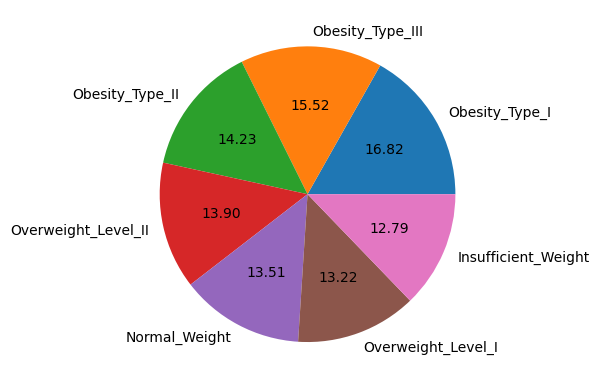

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['NObeyesdad'].value_counts(),labels=['Obesity_Type_I','Obesity_Type_III','Obesity_Type_II','Overweight_Level_II','Normal_Weight','Overweight_Level_I','Insufficient_Weight'],autopct="%0.2f")
plt.show()

In [23]:
# Data is balanced

## 3. Feature Extraction and Splitting Data

In [24]:
# step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['NObeyesdad']),df['NObeyesdad'],
                                                test_size=0.2,
                                                random_state=42)

In [25]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent_high_caloric_food,Vegetables_in_meal,No._of_main_meals_daily,Any_food_between_meals,SMOKE,Daily_drinking_Water,Calories_monitoring_daily,Physical_activity,Time_spent_in_technological_devices,Alcohol,MeansOfTransport
44,Male,21.000000,1.810000,80.000000,no,no,1.00000,3.000000,no,no,2.000000,no,2.000000,0.000000,no,Public_Transportation
691,Male,18.000000,1.786758,51.524444,no,yes,2.91548,3.000000,Sometimes,no,1.777486,no,1.077469,1.000000,Sometimes,Public_Transportation
667,Male,22.396504,1.869098,61.411141,yes,yes,3.00000,3.263201,Sometimes,no,2.233274,no,1.557737,0.000355,Sometimes,Automobile
170,Male,22.000000,1.720000,82.000000,no,yes,2.00000,1.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Sometimes,Public_Transportation
310,Male,17.000000,1.790000,57.000000,yes,yes,2.00000,4.000000,Frequently,no,2.000000,no,2.000000,1.000000,no,Public_Transportation


In [26]:
y_train.sample(5)

112          Normal_Weight
447     Overweight_Level_I
1788       Obesity_Type_II
1878      Obesity_Type_III
1758       Obesity_Type_II
Name: NObeyesdad, dtype: object

In [27]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse_output=False,drop='first'),[0,4,5,8,9,11,14,15]),
    ('tnf2',StandardScaler(),[1,2,3,6,7,10,12,13])
])
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [29]:
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

## 4. Model Training and Evaluation

In [30]:
clf = LogisticRegression()
clf.fit(X_train_transformed,y_train_transformed)
y_pred = clf.predict(X_test_transformed)
from sklearn.metrics import accuracy_score
accuracy_score(y_test_transformed,y_pred)

C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.868421052631579

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [33]:
clfs = {
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc
}

In [34]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    return accuracy

In [35]:
for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf,X_train_transformed,y_train_transformed,X_test_transformed,y_test_transformed)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)

For  DT
Accuracy -  0.8157894736842105
For  KN
Accuracy -  0.854066985645933
For  RF
Accuracy -  0.9497607655502392


In [36]:
# one hot encoding
trf1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'),[0,4,5,8,9,11,14,15])
],remainder='passthrough')

In [37]:
X_train.shape

(1669, 16)

In [38]:
# scaling
trf2 = ColumnTransformer([
    ('scaler',StandardScaler(),slice(0,30))
])

In [39]:
# train the model
trf3 = RandomForestClassifier(n_estimators=50, random_state=2)

### Create Pipeline

In [40]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [41]:
# train
pipe.fit(X_train,y_train_transformed)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 4, 5, 8, 9, 11, 14,
                                                   15])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  slice(0, 30, None))])),
                ('trf3',
                 RandomForestClassifier(n_estimators=50, random_state=2))])

### Explore the Pipeline

In [42]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse_output=False),
                                  [0, 4, 5, 8, 9, 11, 14, 15])]),
 'trf2': ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                  slice(0, 30, None))]),
 'trf3': RandomForestClassifier(n_estimators=50, random_state=2)}

In [43]:
# Predict
y_pred = pipe.predict(X_test)
accuracy_score(y_test_transformed,y_pred)

0.9497607655502392

### Cross validation using Pipeline

In [44]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.933495171818525

### Exporting the Pipeline

In [45]:
# export
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

## Congratulations!
We have developed the model to estimate the obesity level of a person with high accuracy.